In [18]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

## Linear Equation

Gaussian elimination. Implement it. Do it once in your life. The use `np.linalg.solve` for the rest.

In [24]:
A = np.array([[1.,1.,1.],
              [2.,-1.,1.],
              [1.,-1.,-2.]])
C = np.array([6.,3.,-7.])

#things we can do with the matrix
# A[0] # print row 1
# A[1,0]#  print A[i,j]
# A[1]= A[1] - 2* A[0]
# A[1]
# temp = A.copy()
# temp

# nrow,ncol = A.shape
# nrow,ncol

def forward_elim(A,C):
    nrow, ncol = A.shape #size 3x3
#     print(nrow, ncol)
    for i_pivot_row in range(nrow): #3
        pivot_row = A[i_pivot_row]
        denom = A[i_pivot_row][i_pivot_row]
        A[i_pivot_row] = A[i_pivot_row] / denom
        C[i_pivot_row] = C[i_pivot_row] / denom
        for i_target_row in range(i_pivot_row+1,nrow):
            coef = A[i_target_row,i_pivot_row] / A[i_pivot_row, i_pivot_row]
            A[i_target_row]= A[i_target_row] - coef*A[i_pivot_row]
            C[i_target_row]= C[i_target_row] - coef*C[i_pivot_row]
            
            denom = A[i_target_row,i_target_row]
            A[i_target_row] = A[i_target_row] / denom
            C[i_target_row] = C[i_target_row] / denom
            
    return A,C

def backward_elim(a,c):
    A = a.copy()
    C = c.copy()
    n_row, m_col = A.shape
    for i_pivot_row in range (n_row-1, -1, -1):
        for i_target_row in range(i_pivot_row-1, -1, -1):
            coef = A[i_target_row,i_pivot_row]/A[i_pivot_row, i_pivot_row]
            A[i_target_row] = A[i_target_row] - coef*A[i_pivot_row]
            C[i_target_row] = C[i_target_row] - C[i_pivot_row]*coef
    return C
            
def gaussian_elim(a,c):
    d,e = forward_elim(a,c)
    return backward_elim(d,e)

gaussian_elim(A,C)
# forward_elim(A,C)
# in exam use forward elim but in real life use work etc use np.linalg.solve

array([1., 2., 3.])

In [20]:
# to check 
# how we do in real life:
np.linalg.solve(A,C)

array([1., 2., 3.])

### Linear Regression

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [21]:
data_x, data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

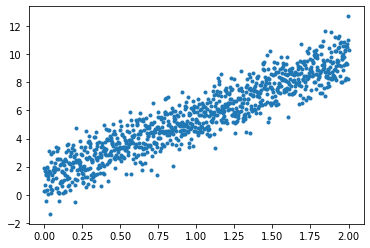

In [22]:
plt.plot(data_x, data_y, '.')

3) What what is the equation for a striaght line?

y = mx + c

[[4.30805437]
 [1.19580916]]


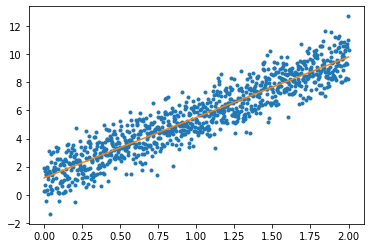

In [23]:
# A and C got from doing the differentiation (see notes)

A = [[sum(data_x**2),sum(data_x)],[sum(data_x),len(data_x)]]
C = [[sum(data_y*data_x)],[sum(data_y)]]
Ans = np.linalg.solve(A,C)
print(Ans)
m = Ans[0]
c = Ans[1]

y = m*data_x + c

plt.plot(data_x, data_y, '.')
plt.plot(data_x,y)

4) What is the difference between a "good line" and a "bad line"?

5) What are we trying to adjust to minimize the $\chi^2$?

6) How do we findind the minimum of $\chi^2$? Whare are they?

7) Find the best slope and the best intercept.

8) Plot the line along with the data point to verify that you actually got the right answer.

9) What is your prediction for the value of `y` when `x`=3.0?

### Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

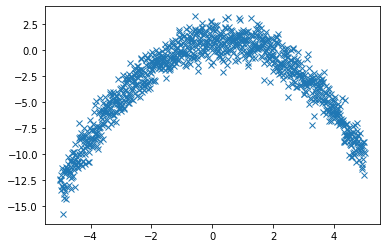

In [26]:
data_x, data_y = np.loadtxt('parabola.txt')
plt.plot(data_x, data_y,'x')

2) What is the general form for parabola?

In [27]:
# use np.linalg.solve

A = [[sum(data_x**4),sum(data_x**3),sum(data_x**2)],[sum(data_x**3),sum(data_x**2),sum(data_x**2)],[sum(data_x**2),sum(data_x**2),len(data_x)]]
C = [[sum(data_y*data_x)],[sum(data_y)]]
Ans = np.linalg.solve(A,C)


ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 2 is different from 3)

3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

# Higher Dimension.

Also, there is no need to stop at 2 dimension.

In [ ]:
np.random.seed(1234567)
def gen_child_height_sample(n_data=100):
    father_height = np.random.randn(n_data)*20 + 170
    mother_height = np.random.randn(n_data)*20 + 160
    # just pretend you didn't see this
    child_height = 0.8*mother_height + 0.2*father_height + 5 + np.random.randn(n_data)*10
    return father_height, mother_height, child_height

father_height, mother_height, child_height = gen_child_height_sample()

We have a reason to believe that a child height is a linear combination of mother's and father's height.

$$
h_{child} = c_{mom} \times h_{mom} + c_{dad} \times h_{dad} + h_0
$$

1.) Plot mother_height vs child_height and father_height vs child_height.

2.) Find appropriate $c_{mom}$ and $c_{dad}$

3) Now that you can't really plot the line on top of distribution to check the answer anymore since you have more than 2 dimensions.

Try plot $h_{child, predicted}$ vs $h_{child, data}$. What do you expect to see and did you get what you expect?

## Even More generalization. Power Law.

Most of physics formula comes in the form of

$Y = K \times A^\alpha B^\beta C^\gamma$

Ex:
- $ F = ma$
- $ K = \frac{1}{2} m v^2$
- $ c = \frac{1}{\sqrt{\mu_0, \epsilon_0}}$

1) How do we turn power law in to linear relation?

2) Turn this in to a linear equation.

3) If we still have time.

Pretend that you are bad at physics and don't know how to calculate kinetic energy from velocity.

Your guess is

$$
K = cv^\alpha
$$

find $c$ and $\alpha$

In [ ]:
np.random.seed(7383672)
def gen_kinetic(n_data=100):
    v = np.random.rand(n_data)*10
    m = 3.33
    k = 1/2*m*v**2*(1+np.random.randn(n_data)*0.05)
    v 
    return v, k

In [ ]:
v, k = gen_kinetic()
plt.plot(v, k, '.')